In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as pat

In [20]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

# Add a regional flag
vdf["IsRegional"] = vdf["GCC_CODE16"].str.contains('\dR', regex = True)

In [21]:
vdf.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,GCC_CODE16,liberal/national coalition votes,australian labor party votes,totalvotes,IsRegional,Preferred Party
0,0,101021007,New South Wales,1RNSW,655,850,1505,True,ALP
1,1,101021008,New South Wales,1RNSW,600,937,1537,True,ALP
2,2,101021009,New South Wales,1RNSW,7954,9937,17891,True,ALP
3,3,101021010,New South Wales,1RNSW,756,1040,1796,True,ALP
4,4,101021011,New South Wales,1RNSW,3023,3052,6075,True,ALP


In [28]:
df = vdf[["STE_NAME16", "IsRegional", "liberal/national coalition votes"
           ,"australian labor party votes","totalvotes"]]
df = df.loc[df["STE_NAME16"] != "Other Territories",]

In [30]:
df.head()

,STE_NAME16,IsRegional,liberal/national coalition votes,australian labor party votes,totalvotes
0,New South Wales,True,655,850,1505
1,New South Wales,True,600,937,1537
2,New South Wales,True,7954,9937,17891
3,New South Wales,True,756,1040,1796
4,New South Wales,True,3023,3052,6075


In [39]:
pdf = df.groupby(["STE_NAME16", "IsRegional"]).sum()
pdf.reset_index(inplace = True)
pdf["lib percent"] = (pdf["liberal/national coalition votes"]/pdf["totalvotes"]) * 100 

# Remove ACT as it doesn't have any regional areas for comparison
pdf = pdf.loc[pdf["STE_NAME16"] != "Australian Capital Territory",]

In [40]:
pdf.head(20)

,STE_NAME16,IsRegional,liberal/national coalition votes,australian labor party votes,totalvotes,lib percent
1,New South Wales,False,1166638,1163036,2329674,50.077307
2,New South Wales,True,824582,705276,1529858,53.899251
3,Northern Territory,False,29478,30229,59707,49.371096
4,Northern Territory,True,6533,6478,13011,50.211360
5,Queensland,False,568285,521520,1089805,52.145567
6,Queensland,True,751185,439261,1190446,63.101140
7,South Australia,False,288947,368788,657735,43.930610
8,South Australia,True,130787,72072,202859,64.471875
9,Tasmania,False,45813,84194,130007,35.238872
10,Tasmania,True,83219,81200,164419,50.613980


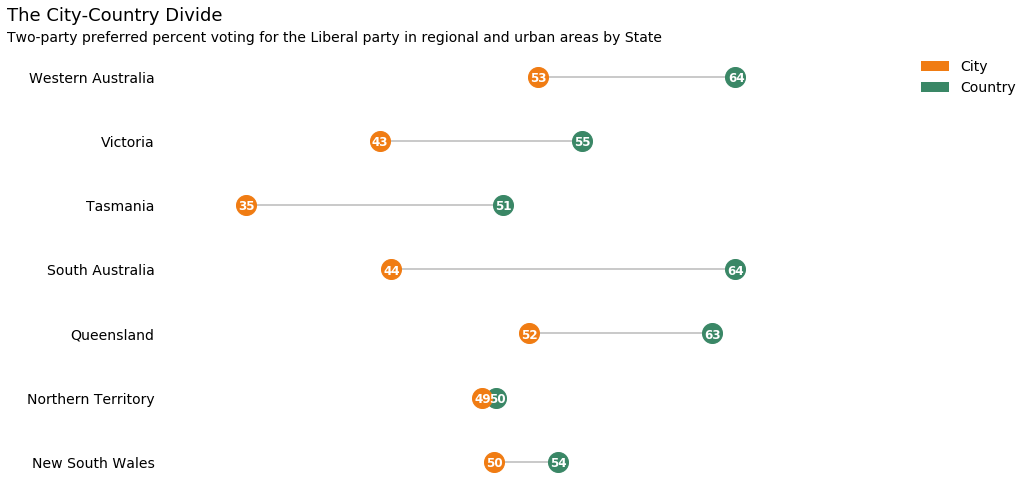

In [258]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8))

# Set default values
reg_colour = "#3a8766"
city_colour = "#f07c13"
line_colour = "#cacaca"

# Ste plot values
states = pdf["STE_NAME16"].unique()

for state in states:
    
    # Get values for plot
    regional = pdf.loc[(pdf["STE_NAME16"] == state) & (pdf["IsRegional"] == True), "lib percent"].values
    city = pdf.loc[(pdf["STE_NAME16"] == state) & (pdf["IsRegional"] == False), "lib percent"].values
    
    # Find index of state being drawn
    i = np.where(states == state)[0]

    # Line segment
    l = mlines.Line2D([city, regional],[i, i], c = line_colour, lw = 2, axes = axes)
    axes.add_line(l)
    
    axes.scatter(regional, state, s = 400, c = reg_colour, zorder = 3)
    axes.scatter(city, state, s = 400, c = city_colour, zorder = 3)
    axes.annotate(int(round(regional[0],0)), (regional - 1.65, i - 0.075)
                  ,textcoords = "offset points"
                  ,xytext = (20, 0)
                  ,c = "white"
                  ,fontsize = 12
                  ,fontweight = "bold"
                 )
    axes.annotate(int(round(city[0],0)), (city - 1.65, i - 0.075)
                  ,textcoords = "offset points"
                  ,xytext = (20, 0)
                  ,c = "white"
                  ,fontsize = 12
                  ,fontweight = "bold"
                 )

# Set title
axes.set_title("Two-party preferred percent voting for the Liberal party in regional and urban areas by State"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.753,1))
fig.suptitle("The City-Country Divide"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.2,0.95))

# Remove spines
axes.spines["top"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_visible(False)

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.set_xlim(30,70)
axes.get_xaxis().set_visible(False)

# Set Legend
legend_elements = [pat.Patch(facecolor = city_colour, label = "City"),
                  pat.Patch(facecolor = reg_colour, label = "Country")]

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(handles = legend_elements, fontsize = 14, frameon = False, bbox_to_anchor = (1.3, 1))

In [259]:
fig.savefig("country_city_divide.png", dpi = 300, bbox_inches = "tight")